# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)

# loading data and preview

In [4]:
df = pd.read_csv('../Data/MarineMicroplastics.csv')

In [5]:
df.head(2)

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,40055,4/3/2011 12:00:00 AM,-30.2413,-97.0948,Pacific Ocean,NaN,NaN,0.390376,pieces/m3,0.005-1,...,275968,https://www.ncei.noaa.gov/access/metadata/land...,4078602b-702b-4514-b625-4b08fb50d16c,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.080854e+07,-3.534605e+06
1,39794,11/27/2010 12:00:00 AM,-33.5729,-13.7057,Atlantic Ocean,NaN,NaN,0.976803,pieces/m3,0.005-1,...,275968,https://www.ncei.noaa.gov/access/metadata/land...,fff505a7-d6da-435d-9b6e-8263bf448e78,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.525712e+06,-3.971596e+06


In [86]:
df.describe()

,FID,Latitude,Longitude,Measurement,Accession Number,x,y
count,13942.000000,13942.000000,13942.000000,13942.000000,13942.000000,1.394200e+04,1.394200e+04
mean,35652.500000,22.860456,-68.851821,19.875033,226976.439033,-7.664550e+06,2.739463e+06
std,4024.853062,19.959507,70.062754,530.429209,27297.838359,7.799350e+06,2.573204e+06
min,28682.000000,-71.699040,-179.994200,0.000000,170967.000000,-2.003686e+07,-1.164563e+07
25%,32167.250000,16.620000,-130.170875,0.000000,211007.000000,-1.449056e+07,1.876635e+06
50%,35652.500000,25.500000,-70.280000,0.007200,211008.000000,-7.823534e+06,2.937284e+06
75%,39137.750000,35.100000,-58.735000,0.069116,253448.000000,-6.538350e+06,4.177479e+06
max,42623.000000,81.090000,179.854333,57665.000000,276482.000000,2.002129e+07,1.627817e+07


The measurement column looks odd, the max value appears to be an obvious outlier. We will need to create a box plot to see how many outliers we actually have.

In [88]:
df.dtypes

FID                   int64
Date                 object
Latitude            float64
Longitude           float64
Oceans               object
Regions              object
SubRegions           object
Measurement         float64
Unit                 object
Density Range        object
Density Class        object
Sampling Method      object
Short Reference      object
DOI                  object
Organization         object
Keywords             object
Accession Number      int64
Accession Link       object
GlobalID             object
CreationDate         object
Creator              object
EditDate             object
Editor               object
Long Reference       object
x                   float64
y                   float64
dtype: object

In [49]:
df.isnull().sum().sort_values(ascending=False)

SubRegions          12932
Regions             10052
Keywords               87
FID                     0
Organization            0
x                       0
Long Reference          0
Editor                  0
EditDate                0
Creator                 0
CreationDate            0
GlobalID                0
Accession Link          0
Accession Number        0
DOI                     0
Date                    0
Short Reference         0
Sampling Method         0
Density Class           0
Density Range           0
Unit                    0
Measurement             0
Oceans                  0
Longitude               0
Latitude                0
y                       0
dtype: int64

## Regions and oceans

In [82]:
#Quick preview of the datapoints with Regions missing
df[df['Regions'].isnull()].head(5)

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,40055,4/3/2011 12:00:00 AM,-30.241300,-97.094800,Pacific Ocean,NaN,NaN,0.390376,pieces/m3,0.005-1,...,275968,https://www.ncei.noaa.gov/access/metadata/land...,4078602b-702b-4514-b625-4b08fb50d16c,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.080854e+07,-3.534605e+06
1,39794,11/27/2010 12:00:00 AM,-33.572900,-13.705700,Atlantic Ocean,NaN,NaN,0.976803,pieces/m3,0.005-1,...,275968,https://www.ncei.noaa.gov/access/metadata/land...,fff505a7-d6da-435d-9b6e-8263bf448e78,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.525712e+06,-3.971596e+06
2,41383,11/22/2018 12:00:00 AM,-34.106500,23.215333,Indian Ocean,NaN,NaN,0.025293,pieces/m3,0.005-1,...,276422,https://www.ncei.noaa.gov/access/metadata/land...,da11404d-fe3c-4dff-9987-8a81d0ce54d9,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Faure, F., C. Saini, G. Potter, F. Galgani, L....",2.584319e+06,-4.043111e+06
3,41122,9/8/2016 12:00:00 AM,-19.952167,-157.687167,Pacific Ocean,NaN,NaN,0.013095,pieces/m3,0.005-1,...,276422,https://www.ncei.noaa.gov/access/metadata/land...,c0f493d3-1fcc-4db2-b749-4e77a23d637c,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Faure, F., C. Saini, G. Potter, F. Galgani, L....",-1.755366e+07,-2.267365e+06
4,35217,4/6/2005 12:00:00 AM,2.190000,-135.730000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6d278226-565e-4ed0-b46a-e1cabb32ecc0,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.510939e+07,2.438491e+05


In [85]:
##Quick preview of the datapoints with Regions that are not missing
df[df['Regions'].notnull()].head(5)

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
7,40790,11/8/2020 12:00:00 AM,37.977500,12.359833,Atlantic Ocean,Mediterranean Sea,Tyrrhenian Sea,1.127342,pieces/m3,1-10,...,276422,https://www.ncei.noaa.gov/access/metadata/land...,ad35c940-10f8-472b-be1f-21a5d6479e14,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Faure, F., C. Saini, G. Potter, F. Galgani, L....",1.375890e+06,4.576248e+06
8,40126,8/1/2010 12:00:00 AM,43.300300,5.246000,Atlantic Ocean,Mediterranean Sea,Western Basin,0.000000,pieces/m3,0-0.0005,...,275968,https://www.ncei.noaa.gov/access/metadata/land...,0ee967e4-9a85-4fc7-8f32-c8e31674c7ba,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",5.839820e+05,5.357793e+06
9,39130,10/9/2014 12:00:00 AM,39.925000,19.282000,Atlantic Ocean,Mediterranean Sea,Adriatic Sea,0.260000,pieces/m3,0.005-1,...,259524,https://www.ncei.noaa.gov/access/metadata/land...,1b3aee78-f7c1-4860-b6b4-17e7006482bd,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Adamopoulou, A., C. Zeri, F. Garaventa, C. Gam...",2.146462e+06,4.855049e+06
10,40719,6/21/2019 12:00:00 AM,57.277200,23.321250,Atlantic Ocean,Baltic Sea,Gulf of Riga,0.054857,pieces/m3,0.005-1,...,276422,https://www.ncei.noaa.gov/access/metadata/land...,f4e725da-493c-40a2-8a1d-b0cca67ca80e,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Faure, F., C. Saini, G. Potter, F. Galgani, L....",2.596110e+06,7.816988e+06
11,42047,8/10/2018 12:00:00 AM,21.560599,113.246920,Pacific Ocean,South China Sea,NaN,1001.000000,pieces/m3,>=10,...,276267,https://www.ncei.noaa.gov/access/metadata/land...,8f1cd5d6-d9e0-4252-82e0-441440f36d01,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Xu, S., L. Chen, K. Zhang, Y. Cao, Y. Ma, H. S...",1.260659e+07,2.458851e+06


In [67]:
#Create A view of all the Oceans and Regions
pd.DataFrame(df[['Oceans','Regions']].groupby('Oceans').value_counts())

0
Oceans         Regions                                                 
Arctic Ocean   Norwegian Sea                                         26
               Northwestern Passages                                 20
               Laptev Sea                                            18
               Greenland Sea                                         18
               Kara Sea                                              16
               Davis Strait                                          12
               Baffin Bay                                             7
               Barents Sea                                            6
               East Siberian Sea                                      6
               White Sea                                              3
               Chukchi Sea                                            2
               Beaufort Sea                                           2
               Hudson Strait                                          1
Atlantic Ocean Caribbean Sea                                       1765
               Mediterranean Sea                                    987
               Gulf of Mexico                                       102
               Stellwagen Bank National Marine Sanctuary             52
               Celtic Sea                                            26
               Gulf of St. Lawrence                                  25
               North Sea                                             18
               New York Bight                                        17
               Coastal Waters of Florida                             15
               Baltic Sea                                            14
               English Channel                                       11
               Black Sea                                             10
               Bay of Biscay                                         10
               Florida Keys National Marine Sanctuary                 9
               Kattegat                                               5
               Skagerrak Strait                                       4
               Labrador Sea                                           2
               Rio de La Plata                                        2
               Inner Seas off the West Coast of Scotland              2
               Gulf of Bothnia                                        1
               Rio de la Plata                                        1
Indian Ocean   Great Australian Bight                                53
               Bay of Bengal                                         34
               Mozambique Channel                                    21
               Arafura Sea                                           18
               Andaman Sea                                           15
               Timor Sea                                             11
               Red Sea                                                1
Pacific Ocean  Tasman Sea                                           102
               South China Sea                                      101
               Coral Sea                                             84
               Gulf of Alaska                                        51
               Coastal Waters of Southeast Alaska and British ...    46
               Philippine Sea                                        31
               Gulf of California                                    26
               Monterey Bay National Marine Sanctuary                11
               East China Sea                                         7
               Bering Sea                                             7
               Solomon Sea                                            6
               Papahanaumokuakea Marine National Monument             5
               Bass Strait                                            5
               Inland Sea             

In [69]:
#Create A view of all the regions and subregions
pd.DataFrame(df[['Regions','SubRegions']].groupby('Regions').value_counts())

0
Regions                   SubRegions                                 
Baltic Sea                Gulf of Riga                              2
                          Gulf of Bothnia                           1
Coastal Waters of Florida Florida Keys National Marine Sanctuary    6
Gulf of Mexico            Coastal Waters of Florida                12
                          Florida Keys National Marine Sanctuary    1
Mediterranean Sea         Western Basin                           356
                          Eastern Basin                           169
                          Balearic Sea                            144
                          Tyrrhenian Sea                           96
                          Aegean Sea                               58
                          Ionian Sea                               50
                          Adriatic Sea                             49
                          Ligurian Sea                             39
                          Alboran Sea                              23
                          Strait of Gibraltar                       3
Red Sea                   Gulf of Suez                              1

## Keywords

In [81]:
#Create a view for all the keywords used
pd.DataFrame(df[['Keywords']].value_counts())

,0
Keywords,
SEA,8665
Adventure Scientist/Citizen Science,1389
Oceaneye Association; Citizen Science,802
The Ocean Cleanup Foundation,769
SV Mir; ORV Alguita; SV Sea Dragon; RV Stad Amsterdam,680
Great Pacific Garbage Patch/SEAPLEX,235
RV Southern Surveyor/RV Solander,171
Citizen science; Surf board; Kayak,124
R/V Tara,124


It looks like keywords is a description of of the data point. It appears there is information on region, researchers, and organization. We'll have to investigate further.

### Findings
We can probably use a classification model to impute the regions and sub regions based on the Latitude,Longitude, and Ocean.

# Plotting

{'whiskers': [<matplotlib.lines.Line2D at 0x25e34149790>,
 'caps': [<matplotlib.lines.Line2D at 0x25e34149dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e34149340>],
 'medians': [<matplotlib.lines.Line2D at 0x25e3404d310>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e3404d940>],
 'means': []}

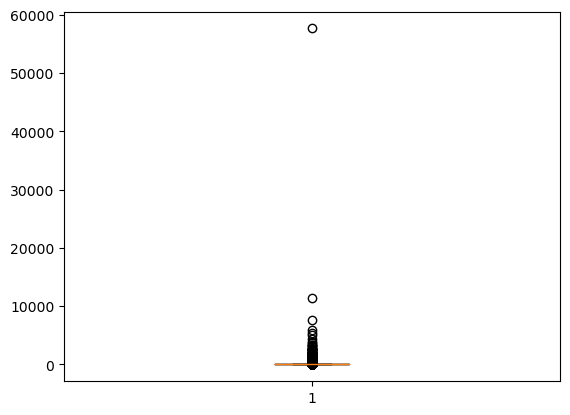

In [13]:
plt.boxplot(x=df['Measurement'])

Boxplot has a lot of outliers, so we can use some scaled histograms to get a better sense of values

<AxesSubplot:ylabel='Frequency'>

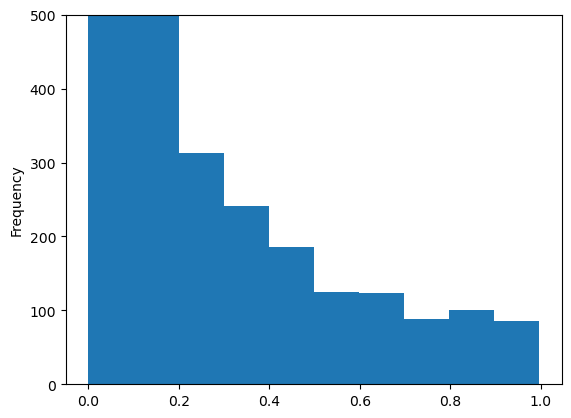

In [11]:
#assume typical range is 0-1, set y label between 0-500 so we can see the tail
plt.ylim((0,500))
df['Measurement'][df['Measurement']<=1].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

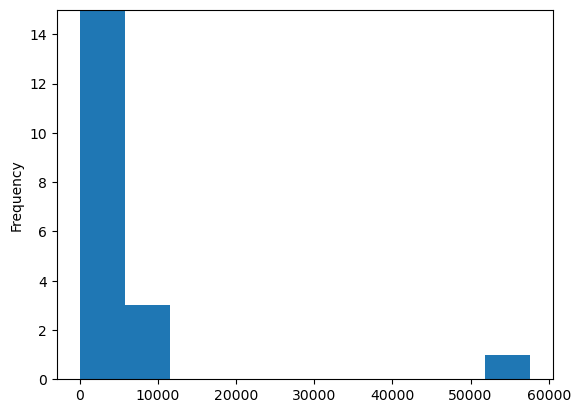

In [15]:
#sees the ranges above 1, set y label between 0-15 so we can see the tail
plt.ylim((0,15))
df['Measurement'][df['Measurement']>1].plot(kind='hist')